# Climate Data Analysis: Central Tendency and Dispersion

**Objective**: Analyze temperature data to understand trends in climate patterns.

**Python Libraries Used**:
- `pandas` for data manipulation
- `matplotlib` for data visualization


In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


## Loading the Dataset

First, we'll load the CSV file containing the temperature data and convert the `dt` column to a datetime format for easier manipulation.


In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/sukrucnCbc/Countries-Temperatures-Data-Analysis/refs/heads/main/dataset/GlobalLandTemperaturesByMajorCity.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())


           dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0  1849-01-01              26.704                          1.435  Abidjan   
1  1849-02-01              27.434                          1.362  Abidjan   
2  1849-03-01              28.101                          1.612  Abidjan   
3  1849-04-01              26.140                          1.387  Abidjan   
4  1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W  


### Converting 'dt' Column to Datetime

Converting the `dt` column to datetime format allows us to easily filter and analyze data based on dates.


In [3]:
# Convert 'dt' column to datetime format
df['dt'] = pd.to_datetime(df['dt'])

# Verify the conversion
print(df.dtypes)


dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object


## Filtering the Data for a Specific Year

We'll filter the dataset to focus on a specific year (e.g., 1850) to perform our analysis.


In [4]:
# Filter data for the year 1850
year = 1850
df_year = df[df['dt'].dt.year == year]

# Display the filtered data
print(df_year)


               dt  AverageTemperature  AverageTemperatureUncertainty     City  \
12     1850-01-01              25.803                          1.943  Abidjan   
13     1850-02-01              27.890                          1.430  Abidjan   
14     1850-03-01              27.852                          2.173  Abidjan   
15     1850-04-01              26.547                          1.662  Abidjan   
16     1850-05-01              25.379                          1.355  Abidjan   
...           ...                 ...                            ...      ...   
237219 1850-08-01              22.145                          2.252     Xian   
237220 1850-09-01              17.215                          1.058     Xian   
237221 1850-10-01              11.169                          1.986     Xian   
237222 1850-11-01               3.280                          1.453     Xian   
237223 1850-12-01              -1.505                          1.990     Xian   

              Country Latit

## Calculating Mean and Median Temperature

Mean and median are measures of central tendency that provide insights into the average and middle values of the temperature data for the selected year.


In [5]:
# Calculate mean temperature for the year
mean_temp = df_year['AverageTemperature'].mean()
print(f"Mean Temperature for {year}: {mean_temp:.2f}°C")

# Calculate median temperature for the year
median_temp = df_year['AverageTemperature'].median()
print(f"Median Temperature for {year}: {median_temp:.2f}°C")


Mean Temperature for 1850: 17.56°C
Median Temperature for 1850: 19.76°C


## Analyzing Temperature Variability

To understand how much the temperatures fluctuate, we'll calculate the standard deviation and the range of temperatures.


In [6]:
# Calculate standard deviation of temperature
std_dev_temp = df_year['AverageTemperature'].std()
print(f"Standard Deviation of Temperature for {year}: {std_dev_temp:.2f}°C")

# Calculate the range of temperature (max - min)
temp_range = df_year['AverageTemperature'].max() - df_year['AverageTemperature'].min()
print(f"Temperature Range for {year}: {temp_range:.2f}°C")


Standard Deviation of Temperature for 1850: 10.34°C
Temperature Range for 1850: 56.14°C


## Visualizing Temperature Trend

A line plot helps visualize how temperatures change over time throughout the selected year.


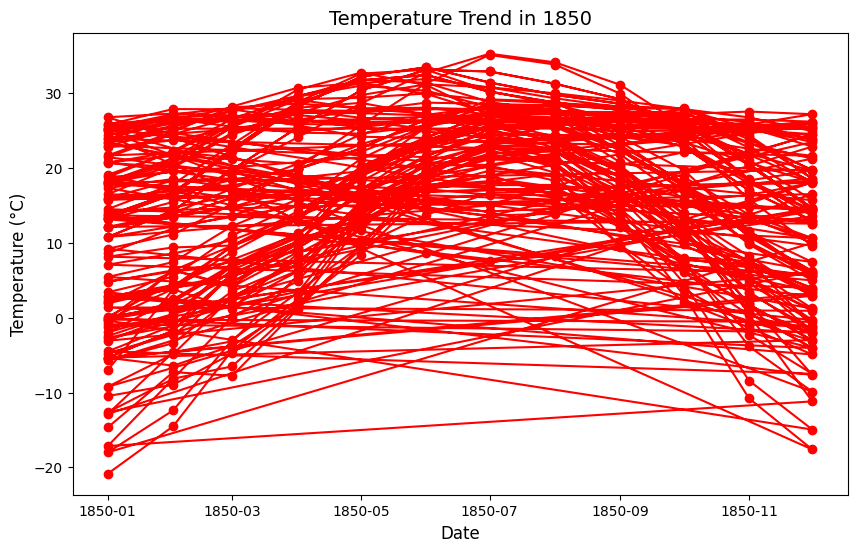

In [19]:
# Line plot for temperature trend over time

plt.figure(figsize=(10, 6))
plt.plot(df_year['dt'], df_year['AverageTemperature'], marker='o', linestyle='-', color='r')
plt.title(f"Temperature Trend in {year}", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)

plt.show()

## Visualizing Temperature Distribution

A histogram provides a clear picture of how temperature values are distributed throughout the year.


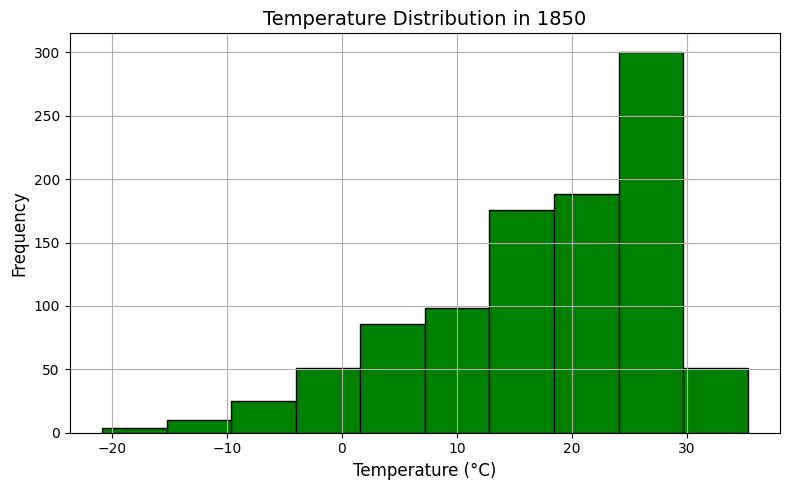

In [20]:
# Histogram for temperature distribution
plt.figure(figsize=(8, 5))
df_year['AverageTemperature'].plot(kind='hist', bins=10, color='green', edgecolor='black')
plt.title(f"Temperature Distribution in {year}", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


## Handling Missing Data

It's essential to check for and handle any missing temperature values to ensure accurate analysis.


In [21]:
# Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())

# Fill missing 'AverageTemperature' values with the median temperature
df['AverageTemperature'].fillna(df['AverageTemperature'].median(), inplace=True)

# Verify that missing values are handled
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values in Each Column:
dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

Missing Values After Handling:
dt                                   0
AverageTemperature                   0
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64


<ipython-input-21-02213d2f0650>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AverageTemperature'].fillna(df['AverageTemperature'].median(), inplace=True)


## Full Code with Conclusion

Below is the complete Python script that performs the entire analysis, followed by a brief conclusion.


<ipython-input-23-5c1bde726ced>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AverageTemperature'].fillna(df['AverageTemperature'].median(), inplace=True)


Mean Temperature for 1850: 17.83°C
Median Temperature for 1850: 20.43°C
Standard Deviation of Temperature for 1850: 9.87°C
Temperature Range for 1850: 56.14°C


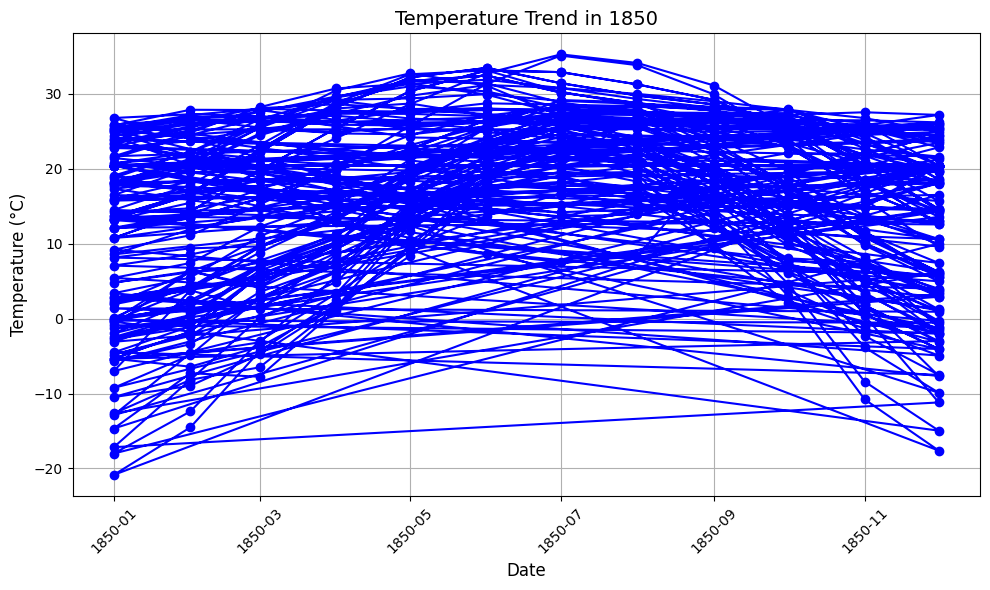

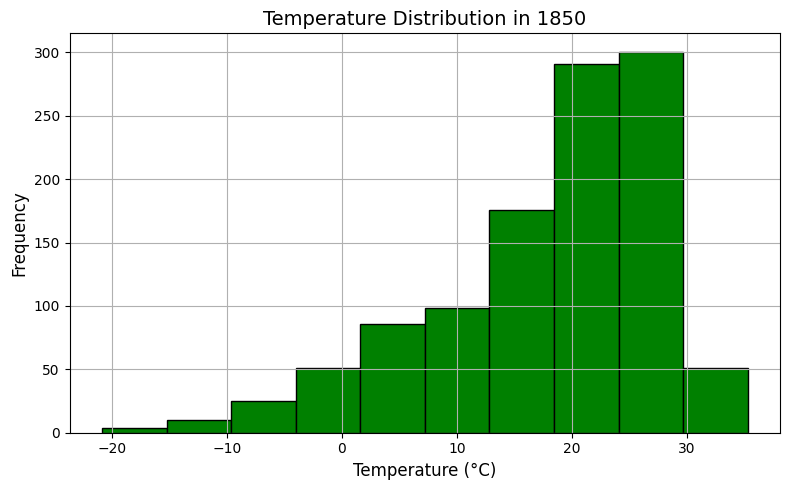

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/sukrucnCbc/Countries-Temperatures-Data-Analysis/refs/heads/main/dataset/GlobalLandTemperaturesByMajorCity.csv"
df = pd.read_csv(url)

# Convert 'dt' column to datetime format
df['dt'] = pd.to_datetime(df['dt'])

# Handle missing data by filling 'AverageTemperature' with median
df['AverageTemperature'].fillna(df['AverageTemperature'].median(), inplace=True)

# Filter data for the year 1850
year = 1850
df_year = df[df['dt'].dt.year == year]

# Calculate mean and median temperature for the year
mean_temp = df_year['AverageTemperature'].mean()
median_temp = df_year['AverageTemperature'].median()

print(f"Mean Temperature for {year}: {mean_temp:.2f}°C")
print(f"Median Temperature for {year}: {median_temp:.2f}°C")

# Calculate standard deviation and temperature range
std_dev_temp = df_year['AverageTemperature'].std()
temp_range = df_year['AverageTemperature'].max() - df_year['AverageTemperature'].min()

print(f"Standard Deviation of Temperature for {year}: {std_dev_temp:.2f}°C")
print(f"Temperature Range for {year}: {temp_range:.2f}°C")

# Line plot for temperature trend over time
plt.figure(figsize=(10, 6))
plt.plot(df_year['dt'], df_year['AverageTemperature'], marker='o', linestyle='-', color='b')
plt.title(f"Temperature Trend in {year}", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram for temperature distribution
plt.figure(figsize=(8, 5))
df_year['AverageTemperature'].plot(kind='hist', bins=10, color='green', edgecolor='black')
plt.title(f"Temperature Distribution in {year}", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusion

- **Mean Temperature**: The average temperature for 1850 provides a general understanding of the climate during that year.
- **Median Temperature**: Offers a central value, less affected by extreme temperatures.
- **Standard Deviation**: Indicates how much the temperatures varied from the mean, reflecting the climate's stability.
- **Temperature Range**: Shows the span between the highest and lowest temperatures recorded in 1850.
- **Visualizations**:
  - **Line Plot**: Illustrates the temperature changes over each month, highlighting any trends or anomalies.
  - **Histogram**: Reveals the distribution of temperature values, indicating how frequently certain temperatures occurred.

This analysis offers a comprehensive overview of the temperature trends and variability for the year 1850, aiding in understanding historical climate patterns.
